# ROBERTa and CNN for drug review

## install and import libraries

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re


## load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train=pd.read_csv('/content/drive/MyDrive/drugsCom/drugsComTrain_raw1.csv')

In [8]:
train


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,5/20/2012,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,4/27/2010,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,12/14/2009,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,11/3/2015,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,11/27/2016,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,5/31/2015,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,11/1/2011,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,3/15/2014,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,9/19/2015,79


In [9]:

test=pd.read_csv('/content/drive/MyDrive/drugsCom/drugsComTest_raw.csv')

In [10]:
test

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [11]:
df=pd.concat([train,test],axis=0).reset_index(drop=True)

In [ ]:
df

## dataset information

In [12]:
train.rating.value_counts()

,count
rating,
10,50989
9,27531
1,21619
8,18890
7,9456
5,8013
2,6931
3,6513
6,6343


In [13]:
df.isnull().sum()

,0
uniqueID,0
drugName,0
condition,1194
review,0
rating,0
date,0
usefulCount,0


In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


In [16]:
print(df['review'].dtype)

object


In [17]:
df.date.max()

'9/9/2017'

In [18]:
df.date.min()

'1-Apr-08'

In [19]:
df['rating'].value_counts()

,count
rating,
10,68005
9,36708
1,28918
8,25046
7,12547
5,10723
2,9265
3,8718
6,8462


In [20]:
df.condition.value_counts()

,count
condition,
Birth Control,38436
Depression,12164
Pain,8245
Anxiety,7812
Acne,7435
...,...
ungal Pneumonia,1
145</span> users found this comment helpful.,1
47</span> users found this comment helpful.,1


In [21]:
df.drugName.value_counts()

,count
drugName,
Levonorgestrel,4930
Etonogestrel,4421
Ethinyl estradiol / norethindrone,3753
Nexplanon,2892
Ethinyl estradiol / norgestimate,2790
...,...
Excedrin Quick Tab,1
Bioflavonoids / zinc glycinate,1
Abstral,1


In [22]:
df.groupby(['drugName'])['review'].nunique().sort_values(ascending=False).reset_index(name='count').head(20)

,drugName,count
0,Levonorgestrel,4925
1,Etonogestrel,4420
2,Ethinyl estradiol / norethindrone,3752
3,Nexplanon,2891
4,Ethinyl estradiol / norgestimate,2788
5,Ethinyl estradiol / levonorgestrel,2500
6,Phentermine,2085
7,Sertraline,1868
8,Escitalopram,1744
9,Mirena,1673


## convert label

In [23]:
    # handle categorical data

df = df.replace({'rating':[1,2,3,4]},0).replace({'rating':[5,6]},1).replace({'rating':[7,8,9,10]},2)  # Create label from  rate column

df.rename(columns = {'rating':'label'}, inplace = True)

df

,uniqueID,drugName,condition,review,label,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",2,5/20/2012,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",2,4/27/2010,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",1,12/14/2009,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",2,11/3/2015,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",2,11/27/2016,37
...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",2,13-Sep-14,43
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",2,8-Oct-16,11
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",2,15-Nov-10,7
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",0,28-Nov-11,20


In [24]:
df.label.value_counts()

,count
label,
2,142306
0,53572
1,19185


## pre-processing

In [25]:
import re
import torch
from transformers import pipeline, AutoTokenizer


device = 0 if torch.cuda.is_available() else -1

def minimal_preprocess(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    # Optional: Handle negations if necessary
    negation_terms = r"\b(?:not|isn't|wasn't|aren't|weren't|don't|doesn't|didn't|haven't|hasn't|hadn't)\b \w+"
    text = re.sub(negation_terms, lambda x: x.group().replace(" ", "_"), text)
    return text

# Preprocess the reviews
df['review'] = df['review'].apply(minimal_preprocess)



In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [27]:
import torch
from transformers import RobertaTokenizer, RobertaModel
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Load RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Use mixed precision to save memory
if device.type == 'cuda':
    model.half()

# Freeze model parameters if you're only generating embeddings
for param in model.parameters():
    param.requires_grad = False

# Dataset class for handling text data
class ReviewDataset(Dataset):
    def __init__(self, reviews, tokenizer, max_length):
        self.tokenizer = tokenizer
        self.texts = reviews
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            return_token_type_ids=False,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten()
        }

# DataLoader for batching the dataset
def create_data_loader(df, tokenizer, max_length, batch_size):
    ds = ReviewDataset(
        reviews=df['review'].to_numpy(),
        tokenizer=tokenizer,
        max_length=max_length
    )
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=2
    )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
# Function to get embeddings from ClinicalBERT
def get_bert_embeddings(data_loader, model, device):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)

            # Calculate embeddings and convert to numpy
            embeddings.append(outputs.last_hidden_state.mean(dim=1).cpu().numpy())

    # Concatenate all embeddings
    return np.concatenate(embeddings)
max_length =256  # Adjust based on your analysis
batch_size = 512   # Adjust based on your hardware capabilities
data_loader = create_data_loader(df, tokenizer, max_length, batch_size)
all_embeddings = get_bert_embeddings(data_loader, model, device)
print(all_embeddings.shape)


(215063, 768)


## save dataset

In [ ]:
np.save('all_embeddings.npy', all_embeddings)

# Optionally, load them back later
#loaded_embeddings = np.load('all_embeddings.npy')
#print(loaded_embeddings.shape)

In [ ]:
df['review'] = df['review'].astype(str)
#train['review'] = train['review'].astype(str)
#test['review'] =  test['review'].astype(str)

In [ ]:
df.dropna(subset=['review'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df.to_csv('processdata.csv', index=False)
#train.to_csv('train_preprocessing.csv', index=False)
#test.to_csv('test_preprocessing.csv', index=False)

# CNN


In [47]:
labels=df.label

In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import pickle
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.utils import class_weight
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint

from keras.layers import Dense, Input, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten, Dropout
from keras.layers import LSTM, Bidirectional, Conv1D, MaxPooling1D, Embedding, Reshape
from tensorflow.keras.layers import Concatenate
from keras.models import Model, load_model
from keras.utils import to_categorical, plot_model
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from keras.callbacks import EarlyStopping, ModelCheckpoint
import unicodedata
import re
import gc


In [49]:
embeddings_np = all_embeddings.numpy() if isinstance(all_embeddings, tf.Tensor) else all_embeddings
labels_np = labels.numpy() if isinstance(labels, tf.Tensor) else labels

In [50]:
from sklearn.model_selection import train_test_split

# Assuming you have features (X) and labels (y)
X_train, X_test, y_train, y_test = train_test_split(embeddings_np , labels,test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [51]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout , BatchNormalization,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model

input_shape=(768,)
inp = Input(shape=input_shape)  # Original input shape: (768,)
inp= Reshape((-1, 1))(inp)

conv1 = Conv1D(filters=512, kernel_size=5, padding='same')(inp)
bn1 = BatchNormalization()(conv1)
act1 = Activation('relu')(bn1)
pool1 = MaxPooling1D(pool_size=2)(act1)
drop1 = Dropout(0.3)(pool1)
# Second Convolutional Layer with Batch Normalization and Dropout
conv2 = Conv1D(filters=256, kernel_size=3, padding='same')(drop1)
bn2 = BatchNormalization()(conv2)
act2 = Activation('relu')(bn2)
pool2 = MaxPooling1D(pool_size=2)(act2)
drop2 = Dropout(0.3)(pool2)

# Flatten the output to feed into Dense layers
flatten = Flatten()(drop2)

dense = Dense(units=128)(flatten)
bn3 = BatchNormalization()(dense)
act3 = Activation('relu')(bn3)
drop3 = Dropout(0.4)(act3)

output = Dense(units=3, activation='softmax')(drop3)  # 3 units for 3 classes, softmax for multiclass

model = Model(inputs=inp, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor_19CLONE (InputLayer)    │ (None, 768, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 768, 512)            │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 768, 512)            │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 768, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 384, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 384, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 384, 256)            │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 384, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 384, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 192, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 192, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,291,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,692,099 (25.53 MB)

 Trainable params: 6,690,307 (25.52 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [53]:
# Convert labels to categorical if they're not already
y_train_cat = to_categorical(y_train, num_classes=3)  # Adjust 'num_classes' based on your label's unique values
y_val_cat = to_categorical(y_val, num_classes=3)



In [54]:
class Metrics(keras.callbacks.Callback):
    def __init__(self, validation):
        super(Metrics, self).__init__()
        self.validation_data = validation

    def on_epoch_end(self, epoch, logs=None):
        # You can perform custom validation or other operations here
        val_loss, val_acc = self.model.evaluate(self.validation_data[0], self.validation_data[1], verbose=1)
        print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")


In [55]:
metrics = Metrics((X_val,y_val_cat))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [56]:
# Define different batch sizes to experiment with
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend as K
batch_size = 256
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train_cat,
                        shuffle=True,
                        batch_size=batch_size,
                        epochs=50,
                        callbacks=[metrics,reduce_lr,early_stopping ],  # Add ReduceLROnPlateau here
                        validation_data=(X_val, y_val_cat))

Epoch 1/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7219 - loss: 0.7006
Validation Loss: 0.6971683502197266, Validation Accuracy: 0.7243025302886963
568/568 ━━━━━━━━━━━━━━━━━━━━ 85s 128ms/step - accuracy: 0.6903 - loss: 0.7851 - val_accuracy: 0.7243 - val_loss: 0.6972 - learning_rate: 0.0010
Epoch 2/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8048 - loss: 0.5034
Validation Loss: 0.5011215209960938, Validation Accuracy: 0.8079975247383118
568/568 ━━━━━━━━━━━━━━━━━━━━ 68s 119ms/step - accuracy: 0.7921 - loss: 0.5398 - val_accuracy: 0.8080 - val_loss: 0.5011 - learning_rate: 0.0010
Epoch 3/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8084 - loss: 0.4990
Validation Loss: 0.4957340657711029, Validation Accuracy: 0.8095474243164062
568/568 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.8017 - loss: 0.5159 - val_accuracy: 0.8095 - val_loss: 0.4957 - learning_rate: 0.0010
Epoch 4/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8091 - loss: 

In [57]:
# Check the shape of y_test
print("Shape of y_test:", y_test.shape)

if len(y_test.shape) == 1:
    ytest = y_test
elif len(y_test.shape) == 2:
    ytest = y_test.argmax(axis=1)

Shape of y_test: (53766,)


In [58]:
result = model.predict(X_test).argmax(axis=-1)
accuracy=accuracy_score(ytest,result)
print(classification_report(ytest, result, digits=4))
print(accuracy)

1681/1681 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
              precision    recall  f1-score   support

           0     0.8144    0.8599    0.8365     13351
           1     0.7033    0.4075    0.5161      4910
           2     0.9142    0.9482    0.9309     35505

    accuracy                         0.8769     53766
   macro avg     0.8106    0.7385    0.7612     53766
weighted avg     0.8702    0.8769    0.8696     53766

0.8768924599189079


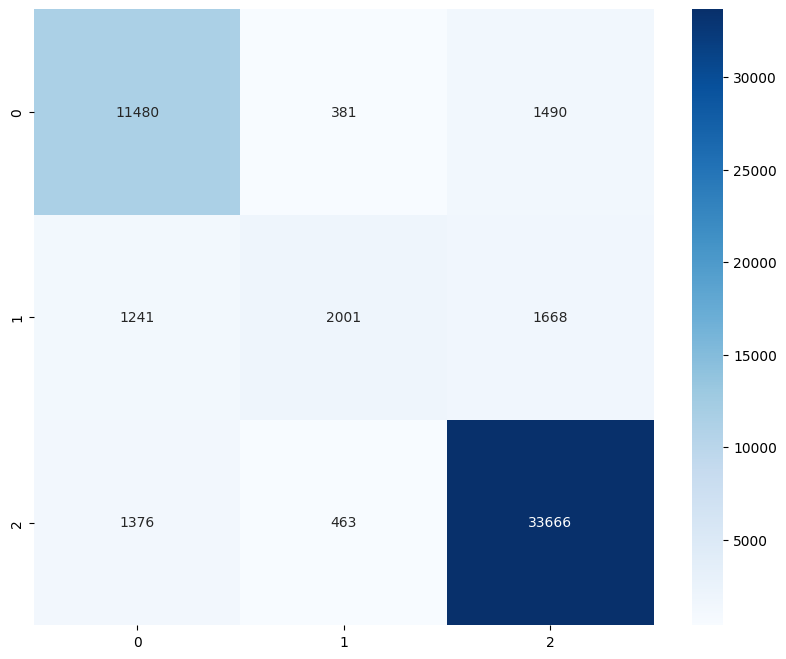

In [59]:
cm=confusion_matrix(ytest, result)
plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()

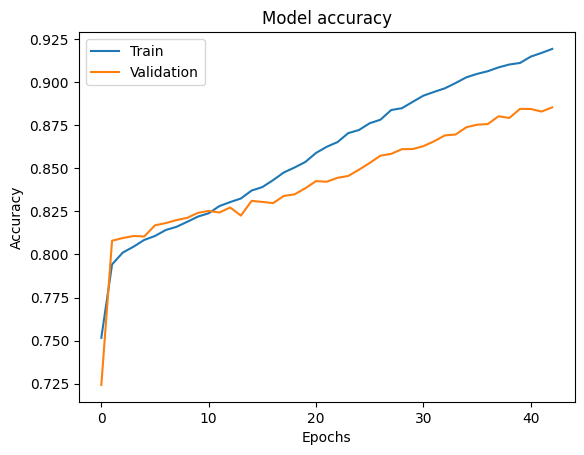

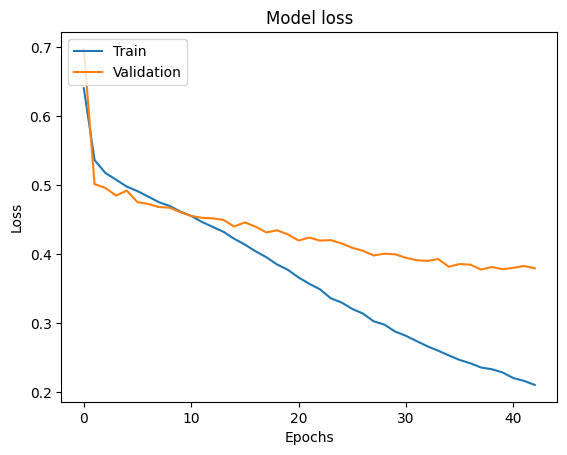

In [60]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
